Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [1]:
NICKNAME = "ariunaK"

---

# Метод Монте-Карло: расчет погрешности
Вероятно, вы уже сталкивались с концепцией [propagation of uncertainty](https://en.wikipedia.org/wiki/Propagation_of_uncertainty). Идея заключается в том, что по заданным измерениям с погрешностями, мы можем найти неопределенность конечного результата. 
Например, рассмотрим следующее равенство:
$$F = \frac{G M_1 M_2}{r^2}$$
Оно определяет гравитационное взаимодействие между двумя телами массами $M_1$ и $M_2$, расположенными друг от друга на расстоянии r. 
Пусть
    $$M_1 = 40 × 10^4 ± 0.05 × 10^4 kg$$ 
    $$M_2 = 30 × 10^4 ± 0.1 × 10^4 kg$$
    $$r = 3.2 ± 0.01 m$$

Предполагаем, что ошибки измерения описываются Гауссовым распределением, величины стандартных отклонений которых суть наблюдаемые неопределённости $a = \left< a\right>\pm \sigma_a$.

Гравитационная постоянная -- константа.
$$G = 6.67384×10^{−11} m^3 kg^{−1} s^{−2}$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Задание 1.1
Напишите функцию, определяющую среднее и стандартное отклонение распределения силы с помощью стандартного метода:
https://en.wikipedia.org/wiki/Propagation_of_uncertainty#Example_formulas

In [3]:
def error(M1, dM1, M2, dM2, r, dr):
    # YOUR CODE HERE
    G = 6.67384 * 10**(-11)
    F = G * M1 * M2 / (r**2)
    sigma = ((G / r**2)**2 * ((M1 * dM2)**2 + (M2 *dM1)**2) + (2 * G * M1 * M2 * dr / r**3)**2) ** 0.5
    return F, sigma

In [4]:
print(error(40*10**4, 0.05 * 10**4, 30 * 10**4, 0.1 * 10**4, 3.2, 0.01))

(0.7820906249999999, 0.005625407272639264)


Теперь давайте попробуем получить то же распределение с помощью метода Монте Карло. Он заключается в многократной генерации случайных входных данных и анализе полученных результатов.
В нашем алгоритм следующий:

1.Генерируем гауссово распределение случайных величин $M_1, M_2$ и $r$ ($10^6$ точек), используя средние значение и стандартные отклонения, указаные выше.
    
2.Для каждой реализации вычисляем силу.

Совет: Не используйте циклы. Чтобы получить $10^6$ случайных точек, используйте библиотеку numpy.

# Задание 1.2 

Напишите функцию, которая моделирует силу методом Монте-Карло и строит нормированную гистограмму.

array([0.75415419, 0.75494611, 0.75573803, 0.75652996, 0.75732188,
       0.75811381, 0.75890573, 0.75969766, 0.76048958, 0.76128151,
       0.76207343, 0.76286536, 0.76365728, 0.76444921, 0.76524113,
       0.76603305, 0.76682498, 0.7676169 , 0.76840883, 0.76920075,
       0.76999268, 0.7707846 , 0.77157653, 0.77236845, 0.77316038,
       0.7739523 , 0.77474423, 0.77553615, 0.77632807, 0.77712   ,
       0.77791192, 0.77870385, 0.77949577, 0.7802877 , 0.78107962,
       0.78187155, 0.78266347, 0.7834554 , 0.78424732, 0.78503924,
       0.78583117, 0.78662309, 0.78741502, 0.78820694, 0.78899887,
       0.78979079, 0.79058272, 0.79137464, 0.79216657, 0.79295849,
       0.79375042, 0.79454234, 0.79533426, 0.79612619, 0.79691811,
       0.79771004, 0.79850196, 0.79929389, 0.80008581, 0.80087774,
       0.80166966, 0.80246159, 0.80325351, 0.80404543, 0.80483736,
       0.80562928, 0.80642121, 0.80721313, 0.80800506, 0.80879698,
       0.80958891])

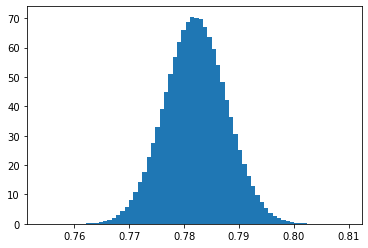

In [5]:
def MonteCarloNormal(M1, dM1, M2, dM2, r, dr, n=10**6):
    # YOUR CODE HERE
    MM1 = np.random.normal(M1, dM1, n - 1)
    MM2 = np.random.normal(M2, dM2, n - 1)
    rr = np.random.normal(r, dr, n - 1)
    G = 6.67384 * 10**(-11)
    F = G * MM1 * MM2 / (rr**2)
    count, bins, patches = plt.hist(F, 70, density=True)
    return bins
MonteCarloNormal(40*10**4, 0.05 * 10**4, 30 * 10**4, 0.1 * 10**4, 3.2, 0.01)

# Задание 1.3

Постройте гистограмму распределения силы методом Монте-Карло,вызвав MonteCarloNormal, а также постройте график гауссовой плотности вероятности с параметрами, полученными из error().

Совет: Убедитесь, что вы верно выбрали пределы величины x и оба графика видны. Выберите разумное количество столбиков гистограммы и сравните форму гистограммы и графика.

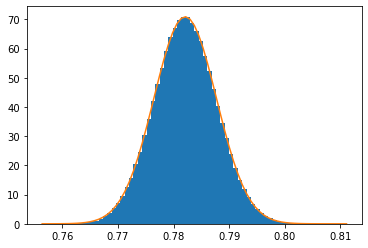

In [8]:

# YOUR CODE HERE
f, sigma = error(40*10**4, 0.05 * 10**4, 30 * 10**4, 0.1 * 10**4, 3.2, 0.01)
b = MonteCarloNormal(40*10**4, 0.05 * 10**4, 30 * 10**4, 0.1 * 10**4, 3.2, 0.01)
plt.plot(b, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (b - f)**2 / (2 * sigma**2)))
plt.show()

Сделайте вывод о согласованности двух подходов.

# Задание 2.1
Повторите те же действия для следующих данных:

$$M1=40×10^4±2×10^4kg$$
$$M2=30×10^4±10×10^4kg$$
$$r=3.2±1.0 m$$

и постройте графики.

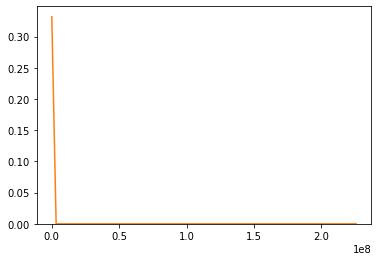

In [14]:
# YOUR CODE HERE
f, sigma = error(40*10**4, 2 * 10**4, 30 * 10**4, 2 * 10**4, 3.2, 1)
b = MonteCarloNormal(40*10**4, 2 * 10**4, 30 * 10**4, 2 * 10**4, 3.2, 1)
plt.plot(b, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (b - f)**2 / (2 * sigma**2) ))
plt.show()

# Задание 2.2

Какой метод более точный в этом случае и почему? Как вы думаете, в чем состоят преимущества метода Монте-Карло?

YOUR ANSWER HERE Более точный метод Монте-Карло. Возможность расчета рисков для нелинейных инструментов и использования любых распределений